# Model Validations

## Introduction

https://www.analyticsvidhya.com/blog/2021/11/top-7-cross-validation-techniques-with-python-code/

https://towardsdatascience.com/several-model-validation-techniques-in-python-1cab3b75e7f1

What is Model validation?
>Model validation is a method of checking how close the predictions of a model is to reality. Likewise, model validation means to calculate the accuracy (or metric of evaluation) of the model that you’re training.There are several different methods that we can use to validate your ML models.

## Content

1. <a href = "#1.-Train-and-Test-Split">Train and Test Split</a>
2. <a href = "#2.-K-Fold-Cross-Validation">K-Fold Cross-Validation</a>
3. <a href = "#3.-Stratified-K-Fold-Cross-Validation">Stratified K-Fold Cross-Validation</a>
4. <a href = "#4.-Leave-P-Out-cross-validation">Leave P Out cross-validation</a>
5. <a href = "#5.-Leave-One-Out-cross-validation">Leave One Out cross-validation</a>
6. <a href = "#6.-Monte-Carlo-Cross-Validation(Shuffle-Split)">Monte Carlo Cross-Validation(Shuffle Split)</a>
7. <a href = "#7.-Time-Series-Cross-Validation">Time Series Cross-Validation</a>

### Libraries

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,LeavePOut,StratifiedKFold,LeaveOneOut, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,KFold
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

## 1. Train and Test Split

This method is the most commonly used in model validation. Here, the dataset for the model is split into training, validation, and the test sample. All these sets are defined below:
Training set: The dataset on which a model trains. All the learning happens on this set of data.
Validation set: This dataset is used to tune the model(s) trained from the dataset. Here, this is also when a final model is chosen to be tested using the test set.
Test set: The generalizability of a model is tested against the test set. It is the final stage of evaluation as it gives a signal if the model is ready for real-life application or not.
The goal of this method is to check the behavior of the model for the new data. The dataset is split into different percentages that mainly depend on your project and the number of resources you have.
The image below gives a clear demonstration of this example.
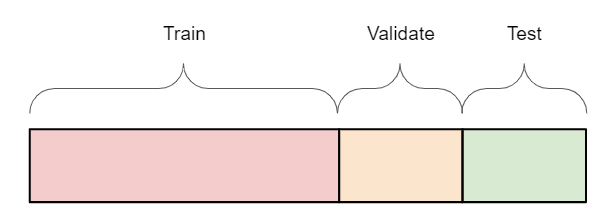

This method does not apply to every situation and it has its pros and cons.
>Pros:
- It is very simple to implement.
- The execution is relatively quick in comparison to other methods.

>Cons:
- For the models with small datasets, this method can decrease the accuracy if there are not enough data points in each set.
- For the accurate evaluation metrics, the split should be random or it becomes inaccurate.
- It can cause models to overfit the validation set.

In [2]:
df = pd.read_csv('../../Data/Iris.csv')
#df = data.frame
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [3]:
print("Size of Dataset {}".format(len(X)))
logreg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
logreg.fit(x_train,y_train)
predict=logreg.predict(x_test)
print("Accuracy score on training set is {}".format(accuracy_score(logreg.predict(x_train),y_train)))
print("Accuracy score on test set is {}".format(accuracy_score(predict,y_test)))

Size of Dataset 150
Accuracy score on training set is 1.0
Accuracy score on test set is 1.0


c:\program files\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[<a href="#Content">Back to Content</a>]

## 2. K-Fold Cross-Validation

K-fold cross-validation solves all the problems of the train/test split. With K-fold cross-validation, the dataset is split into K folds or sections and each of the fold is used as a test set at some position.
For example, imagine having a 4-fold cross-validation set — with four folds, the model will be tested four times, where each fold is used as the test set and the other folds are used as the training set. Then, the model’s final evaluation is simply the average of all k tests. The image below gives a clear demonstration of the process.
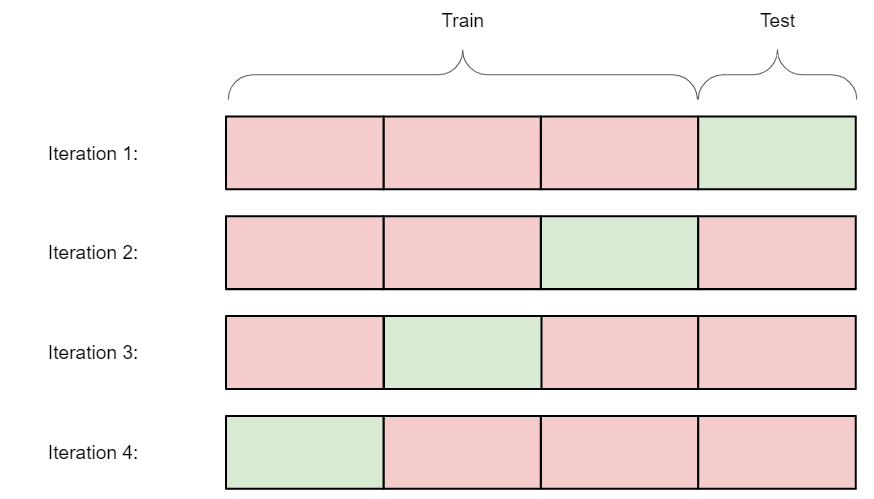
This method has the following pros and cons:
>Pros:
- The evaluation metrics generated by this method are a lot more realistic.
- The overfitting problem is solved to a great extent.
- This results in reduced bias.

>Cons:
- It takes a lot of computational power as more calculations are needed to be done.
- Similarly the time required is greater as well.

In [4]:
logreg=LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

c:\program files\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\program files\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Cross Validation Scores are [1.         0.5        1.         0.73333333 1.        ]
Average Cross Validation score :0.8466666666666667


c:\program files\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[<a href="#Content">Back to Content</a>]

## 3. Stratified K-Fold Cross-Validation

Stratified K-Fold is an enhanced version of K-Fold cross-validation which is mainly used for imbalanced datasets. Just like K-fold, the whole dataset is divided into K-folds of equal size.
The stratified k-fold method is the extension of the simple k-cross-validation which is mainly used for classification problems. The splits in this method are not random like the k-cross-validation. Stratification ensures that each fold is representative of all strata of the data — specifically, it aims to ensure that each class is equally represented across each test fold.
Let us take a simple example for a classification problem where our machine learning model identifies a cat or a dog from the image. If we have a dataset where 70% of pictures are of cats and the other 30% are dogs, in the stratified k-Fold, we will maintain the 70/30 ratio for each fold.
This technique is ideal when we have smaller datasets and we have to maintain the class ratio as well. Sometimes, the data is over or undersampled to match the required criteria.
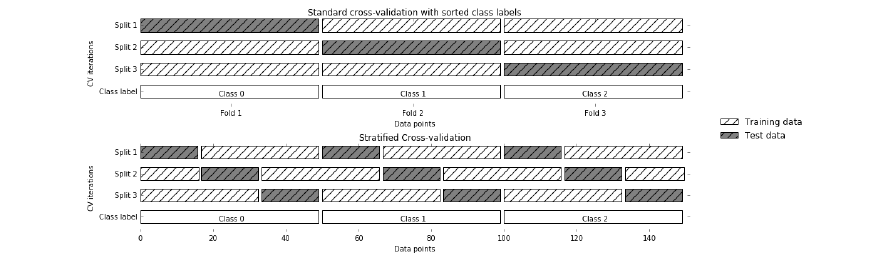
The pros and cons of this method are as follows:
>Pros:
- It works well for a dataset with few training examples and imbalanced data.
- The class ratio is preserved.

>Cons:
- It is not an ideal approach for regression problems.
- It struggles with larger datasets for the best results.

In [5]:
logreg=LogisticRegression()
stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(logreg,X,y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

c:\program files\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\program files\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Cross Validation Scores are [0.86666667 1.         1.         1.         0.83333333]
Average Cross Validation score :0.9400000000000001


c:\program files\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[<a href="#Content">Back to Content</a>]

## 4. Leave P Out cross-validation

LeavePOut cross-validation is an exhaustive cross-validation technique, in which p-samples are used as the validation set and remaining n-p samples are used as the training set.

Suppose we have 100 samples in the dataset. If we use p=10 then in each iteration 10 values will be used as a validation set and the remaining 90 samples as the training set.

This process is repeated till the whole dataset gets divided on the validation set of p-samples and n-p training samples.

>Pros:
- All the data samples get used as both training and validation samples.

>Cons:
- High computation time: As the above technique will keep on repeating until all samples get used up as a validation set, it will have higher computational time.
- Not Suitable for Imbalanced dataset: Same as in K-Fold Cross-validation, if in the training set we have samples of only 1 class then our model will not be able to generalize for the validation set.

In [6]:
lpo=LeavePOut(p=2)
lpo.get_n_splits(X)
tree=RandomForestClassifier(n_estimators=10,max_depth=5,n_jobs=-1)
score=cross_val_score(tree,X,y,cv=lpo)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1. 1. 1. ... 1. 1. 1.]
Average Cross Validation score :0.9931096196868009


[<a href="#Content">Back to Content</a>]

## 5. Leave One Out cross-validation

LeaveOneOut cross-validation is an exhaustive cross-validation technique in which 1 sample point is used as a validation set and the remaining n-1 samples are used as the training set.

Suppose we have 100 samples in the dataset. Then in each iteration 1 value will be used as a validation set and the remaining 99 samples as the training set. Thus the process is repeated till every sample of the dataset is used as a validation point.

It is the same as LeavePOut cross-validation with p=1.
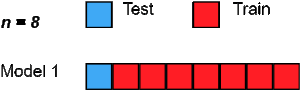

In [7]:
loo=LeaveOneOut()
tree=RandomForestClassifier(n_estimators=10,max_depth=5,n_jobs=-1)
score=cross_val_score(tree,X,y,cv=loo)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Average Cross Validation score :1.0


[<a href="#Content">Back to Content</a>]

## 6. Monte Carlo Cross-Validation(Shuffle Split)

Monte Carlo cross-validation, also known as Shuffle Split cross-validation, is a very flexible strategy of cross-validation. In this technique, the datasets get randomly partitioned into training and validation sets.

We have decided upon the percentage of the dataset we want to be used as a training set and the percentage to be used as a validation set. If the added percentage of training and validation set size is not sum up to 100 then the remaining dataset is not used in either training or validation set.

Let’s say we have 100 samples and 60% of samples to be used as training set and 20% of the sample to be used as validation set then the remaining 20%( 100-(60+20)) is not to be used.

This splitting will be repeated ‘n’ times that we have to specify.
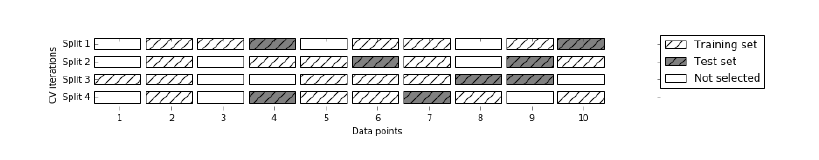

>Pros:
- We are free to use the size of the training and validation set.
- We can choose the number of repetitions and not depend on the number of folds for repetitions.

>Cons:
- Few samples may not be selected for either training or validation set.
- Not Suitable for Imbalanced datasets: After we define the size of the training set and validation set, all the samples are randomly selected, so it may happen that the training set may don’t have the class of data that is in the test set, and the model won’t be able to generalize for unseen data.

In [8]:
logreg=LogisticRegression()
shuffle_split=ShuffleSplit(test_size=0.3,train_size=0.5,n_splits=10)

In [9]:
scores=cross_val_score(logreg,X,y,cv=shuffle_split)
print("cross Validation scores:n {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

c:\program files\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\program files\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

cross Validation scores:n [1.         1.         0.97777778 1.         1.         1.
 1.         1.         1.         1.        ]
Average Cross Validation score :0.9977777777777778


c:\program files\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\program files\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[<a href="#Content">Back to Content</a>]

## 7. Time Series Cross-Validation

What is a Time Series Data?
>Time series data is data that is collected at different points in time. As the data points are collected at adjacent time periods there is potential for correlation between observations. This is one of the features that distinguishes time-series data from cross-sectional data.

How cross-validation is done in the case of Time-series data?
>In the case of time-series data, we cannot choose random samples and assign them to either training or validation set as it makes no sense in using the values from the future data to predict values of the past data.As the order of the data is very important for time series related problems, so we split the data into training and validation set according to time, also called as “Forward chaining” method or rolling cross-validation.We start with a small subset of data as the training set. Based on that set we predict later data points and then check the accuracy.The Predicted samples are then included as part of the next training dataset and subsequent samples are forecasted.

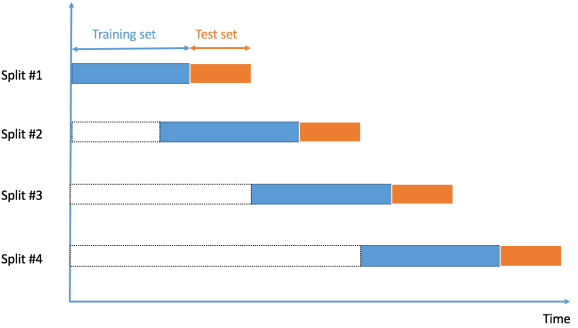

>Pros:
- One of the finest techniques .

>Cons:
- Not suitable for validation of other data types: As in other techniques we choose random samples as training or validation set, but in this technique order of data is very important.

In [10]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
time_series = TimeSeriesSplit()
print(time_series)
for train_index, test_index in time_series.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


[<a href="#Content">Back to Content</a>]

In [ ]:
#tested:no errors